* Link bài viết:
  * [https://machinelearningcoban.com/2017/01/12/gradientdescent/#1-gi%e1%bb%9bi-thi%e1%bb%87u](https://machinelearningcoban.com/2017/01/12/gradientdescent/#1-gi%e1%bb%9bi-thi%e1%bb%87u)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Gradient Descent cho hàm 1 biến
* Cho hàm số $f(x) = x^2 + 5\sin(x)$ với đạo hàm $f'(x) = 2x + 5\cos(x)$.<br><br>
  ![](./images/00.00.png)

* Hàm `grad()` dưới đây dùng để tính đạo hàm.

In [26]:
def grad(x):
    return 2*x + 5*np.cos(x)

* Hàm `cost()` dùng để tính giá trị của hàm số. Hàm này được dùng để kiểm tra việc tính đạo hàm có đúng hay ko hoặc dc dùng để xem giá trị của đạo hàm có dc giảm qua mỗi vòng lặp ko.

In [27]:
def cost(x):
    return x**2 + 5*np.sin(x)

* Hàm `myGD1()` là phần chính thực hiện thuật toán Gradient Descent.
* Tham số `eta` chính là learning rate và `x0` là điểm bắt đầu.

In [28]:
def myGD1(grad, eta, x0):
    x = [x0]
    
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        
        if abs(grad(x_new)) < 1e-3:
            break
        
        x.append(x_new)
        
    return (x, it)

* Giả sử điểm bắt đầu là:
  * `x0` $= -5$
  * `eta` $= 0.1$

In [29]:
x0 = -5
eta = 0.1

x1, it1 = myGD1(grad, eta, x0)

print(f"Solution x1 = {x1[-1]:.5f}, cost = {cost(x1[-1]):.5f}, obtained after {it1} iterations.")

Solution x1 = -1.11067, cost = -3.24639, obtained after 11 iterations.


* Giả sử điểm bắt đầu là:
  * `x0` $= 5$
  * `eta` $= 0.1$

In [30]:
x0 = 5
eta = 0.1

x2, it2 = myGD1(grad, eta, x0)

print(f"Solution x2 = {x2[-1]:.5f}, cost = {cost(x2[-1]):.5f}, obtained after {it2} iterations.")

Solution x2 = -1.11034, cost = -3.24639, obtained after 29 iterations.


##### Trực quan hóa kết quả

In [31]:
def drawGD1d(x1, ids, nrows = 2, ncols = 4, start = -5.5):
    x0 = np.linspace(start, 5.5, 1000)
    y0 = cost(x0)
    width = 4*ncols
    height = 4*nrows
    
    plt.close('all')
    fig, axs = plt.subplots(nrows, ncols, figsize = (width, height))
    
    for i, k in enumerate(ids):
        r = i//ncols
        c = i%ncols
        
        x = x1[ids[i]]
        y = cost(x)
        str0 = f'iter {ids[i]}/{len(x1) - 1}, grad = {grad(x):.3f}'
        
        if nrows > 1:
            axs[r, c].plot(x0, y0, 'b')
            axs[r, c].set_xlabel(str0, fontsize=13)
            axs[r, c].plot(x, y, 'ro', markersize=7, markeredgecolor='k') # vẽ điểm đỏ
            axs[r, c].tick_params(axis='both', which='major', labelsize=13) # làm cho các thang chia rộng ra
        else:
            axs[c].plot(x0, y0, 'b')
            axs[c].set_xlabel(str0, fontsize=13)
            axs[c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[c].tick_params(axis='both', which='major', labelsize=13)
            
    plt.show()

* Chọn trường hợp tốt nhất:
  * `eta` $= 0.1$
  * `x0` $= -5$
  để vẽ biểu đồ.

Solution x1 = -1.11067, cost = -3.24639, obtained after 11 iterations.


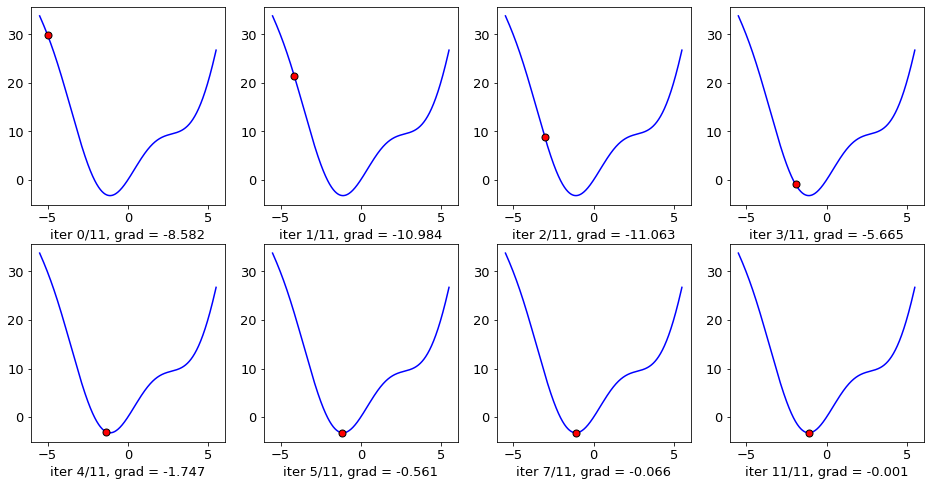

In [32]:

x0 = -5
eta = 0.1

x1, it1 = myGD1(grad, eta, x0)
print(f"Solution x1 = {x1[-1]:.5f}, cost = {cost(x1[-1]):.5f}, obtained after {it1} iterations.")
ids1 = [0, 1, 2, 3, 4, 5, 7, 11]
drawGD1d(x1, ids1)

* Với trường hợp:
  * `eta` $= 0.01$
  * `x0` $= -5$

Solution x2 = -1.11799, cost = -3.24621, obtained after 99 iterations.


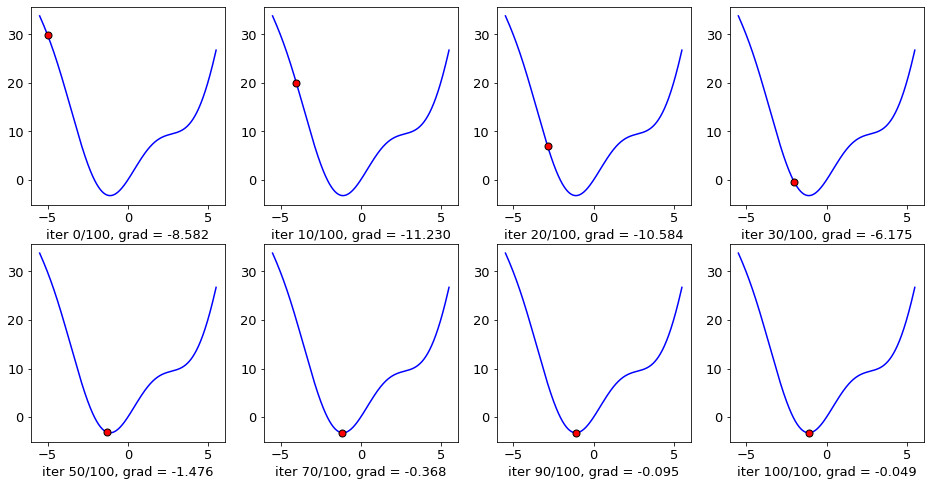

In [33]:
x0 = -5
eta = 0.01

x2, it2 = myGD1(grad, eta, x0)
print(f"Solution x2 = {x2[-1]:.5f}, cost = {cost(x2[-1]):.5f}, obtained after {it2} iterations.")
ids2 = [0, 10, 20, 30, 50, 70,  90, 100]
drawGD1d(x2, ids2)

* Với trường hợp:
  * `eta` $= 0.5$
  * `x0` $= -5$

Solution x3 = -2.38815, cost = 2.28252, obtained after 99 iterations.


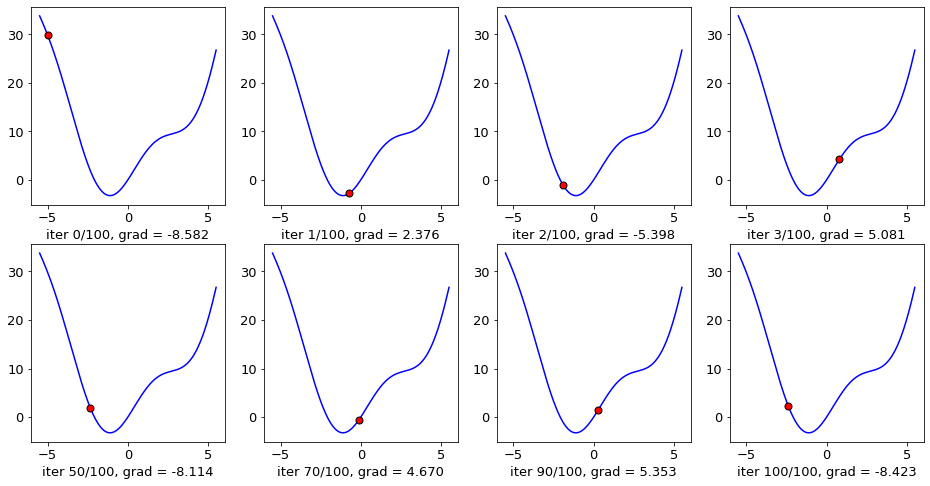

In [37]:
x0 = -5
eta = 0.5

x3, it3 = myGD1(grad, eta, x0)
print(f"Solution x3 = {x3[-1]:.5f}, cost = {cost(x3[-1]):.5f}, obtained after {it3} iterations.")
ids3 = [0, 1, 2, 3, 50, 70,  90, 100]
drawGD1d(x3, ids3)

* Giả sử điểm bắt đầu là:
  * `x0` $= 5$
  * `eta` $= 0.1$

Solution x4 = -1.11034, cost = -3.24639, obtained after 29 iterations.


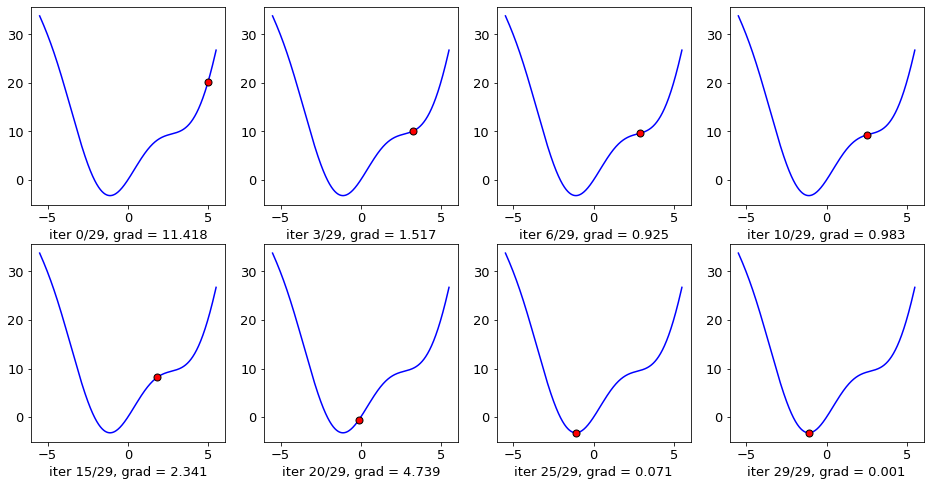

In [35]:
x0 = 5
eta = 0.1

x4, it4 = myGD1(grad, eta, x0)
print(f"Solution x4 = {x4[-1]:.5f}, cost = {cost(x4[-1]):.5f}, obtained after {it4} iterations.")
ids4 = [0, 3, 6, 10, 15, 20, 25, 29]
drawGD1d(x4, ids4)